
# Emotion Identification

In this notebook, we'll classify the emotions present in audio recordings using machine learning. We will train a neural network to classify emotions after using the librosa framework to extract attributes from audio recordings.


## Importing libraries

First, we will start by importing the necessary libraries.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import librosa
import os, glob, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from os import listdir

## Extracting audio filenames and emotions

We begin by making separate lists for the audio filenames and associated emotions. The variables audio path and audio emotion respectively contain the audio files' paths and emotions. The filenames are mined for the emotions.


In [2]:
path = 'C:/Users/HP/OneDrive/Documents/Audacity IIIT/AudioWAV/'
audio_path = []
audio_emotion = []

In [3]:
# collects all the audio filename in the variable 'path'
directory_path = listdir(path)

In [4]:
for audio in directory_path:
    audio_path.append(path + audio)
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")

In [5]:
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
#print(len(dataset))
print(dataset.head())
# print(dataset['File Path'][55])

                                                Path Emotions
0  C:/Users/HP/OneDrive/Documents/Audacity IIIT/A...    angry
1  C:/Users/HP/OneDrive/Documents/Audacity IIIT/A...  disgust
2  C:/Users/HP/OneDrive/Documents/Audacity IIIT/A...     fear
3  C:/Users/HP/OneDrive/Documents/Audacity IIIT/A...    happy
4  C:/Users/HP/OneDrive/Documents/Audacity IIIT/A...  neutral


## Visualizing emotions

We can visualize the emotions of the audio files using a histogram.

<AxesSubplot:title={'center':'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

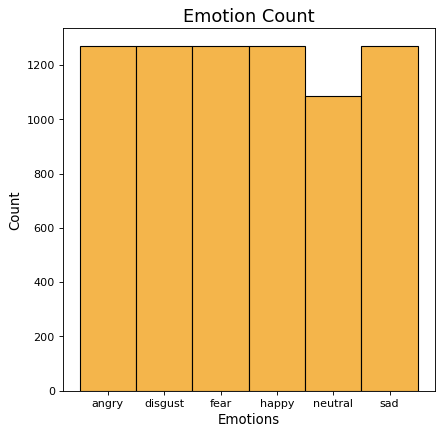

In [6]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')
#plt.show()


## Extracting features from audio files

We will now take the required features out of the audio files. The emotion label for each audio track will be stored in a dataframe together with the MFCC and Mel characteristics that we have extracted from the audio files.

In [7]:
X, Y = [], []
print("Feature processing...")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # noise injection
    noise_amp = 0.035 * np.random.uniform() * np.amax(value)
    value = value + noise_amp * np.random.normal(size=value.shape[0])
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    #print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)

Feature processing...


In [8]:
# print(X)
# print(Y)
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
#print(extracted_audio_df.isna().any())

(7442, 30457)
               0          1          2          3          4          5  \
7432 -705.221642 -53.694329  -2.931700  16.362789  10.331152  19.504666   
7433 -686.019674 -69.574294  -3.105875  31.758380  19.076160  -8.020408   
7434 -679.554973 -70.103256 -23.702807  18.818556  13.311338 -15.252025   
7435 -794.647274 -24.942598 -14.585918  12.539033  10.959513   2.054207   
7436 -684.322812 -57.432735   7.892476  17.478779  -8.662243   6.859553   
7437 -728.807598 -58.677698 -15.605139  30.048475  12.703415  -7.749129   
7438 -722.451717 -44.153613 -11.023437  21.076496   9.784879   2.347162   
7439 -728.696743 -58.436418   5.042817  28.794834  10.554210   5.765407   
7440 -748.956269 -37.807179  19.307036  21.624446  -3.190309  -3.551754   
7441 -742.152378 -82.236785  -1.028333  22.393238  17.045150  -2.040978   

              6          7          8          9  ...  30447  30448  30449  \
7432 -39.693287 -11.699640  13.942040  -6.507607  ...    NaN    NaN    NaN   
7433

## Preparing data for training

We will now divide the data into training and testing sets and use the StandardScaler function to standardise the data.

In [9]:
# preparing to train
X = extracted_audio_df.drop(labels='emotion_of_audio', axis= 1)
Y = extracted_audio_df['emotion_of_audio']

x_train, x_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Training the Model

From the sklearn.neural network library, we will now build an instance of the MLPClassifier and fit it to the training set of data.

In [10]:
mlp_model = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100, 
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fitting mlp model
mlp_model.fit(x_train,y_train)

MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

## Evaluating the Model

From the sklearn.neural network library, we will now build an instance of the MLPClassifier and fit it to the training set of data.

In [11]:
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("\nModel:{}    Accuracy: {:.2f}%".
          format(type(mlp_model).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 41.17%


## Model Predictions

Finally, we can print out the predictions made by the model on the testing set.

In [12]:
print("The Model's Prediction ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df.head())

The Model's Prediction 
<<<===========================================>>>
       Actual  Predict
1238      sad      sad
1540  disgust     fear
5293    angry    happy
7001      sad  neutral
142      fear     fear
